# Laboratory 02: Non-Linear & Regularized Regression Models

Thus far, we saw how to use Linear Regression in the context of stock price prediction. As long as the trend between features X and targets y was quasi-linear, the model performed pretty well at this task. However, generally this is not the case.

So, we need to extend our regression model capacity to capture non-linear characteristics of our input. This of course comes at cost, namely: we may run into overfitting problems since we do not know the optimal model capacity beforehand. To mitigate these effects we can use regularized models along with cross-validation. Moreover, we can use cross-validation in conjunction with the grid-search strategy to find optimal parameters.

To demonstrate the usage of such strategies we are going to use the Boston Housing dataset presented bellow to predict house prices. 

## Boston housing dataset

- Number of Instances: 506
- Number of Attributes: 13 numeric/categorical predictive. 
- Median Value (attribute 14) is usually the target.

- Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's
        
You can find the full description in the 'descriptio.txt' file.


## Exploratory Data Analysis

First, we need perform some exploratory data analysis to get a better picture with what we're dealing. For this task, as usual we will make use of *pandas, numpy* and *matplotlib*, along with the *seaborn* package.

In [ ]:
# Data processing and visalization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utilities.plotting_helpers import plot_learning_curve
plt.style.use('ggplot')
%matplotlib inline

              
### seaborn

[Seaborn](https://seaborn.pydata.org/introduction.html) is a library for making statistical graphs in Python. It is built on top of matplotlib and closely integrated with pandas data structures. In this laboratory we're going to use only 3 functionalities described bellow. However, I strongly encourage you to checkout [the package](https://seaborn.pydata.org/api.html) in more detail as it makes plotting complicated statistics a breeze.

In [ ]:
import seaborn as sns

 - `sns.set()`sets the aesthetic visualization parameters in one step. That is, we can supply a dictionary structure to the `rc` parameter in order to set various different parameters for the style of visualization. For example, we can set the figure size 7x4 inches, width x hight, by simply doing the following call:
```Python
sns.set(rc={'figure.figsize':(7, 4)})
```

- `sns.distplot(pd.Series, bins=x)` plots a univariate distribution of observations stored in pandas Series object, like a column (i.e. it works similarly to the df.hist() method provided within pandas). For example:
```Python
sns.distplot(df['CRIM'], bins=20) 
```
would display univariate distribution of the *crime rate per capita* with 20 bins.


- `sns.heatmap(data=matrix, annot=True)` plots a color-encoded matrix while annotating each cell with the corresponding value in the matrix. This is very useful for plotting correlation matrices generated with `df.corr()`, as it is often the case in the data pre-processing step of machine learning algorithms.

### Task 1 - Boston dataset EDA

Now we are ready to investigate the *Boston Housing* dataset. First, we need to import our dataset in a pandas data frame from the file located at 'datasets/boston-housing.csv'. Complete the TODO bellow.

In [ ]:
# TODO 1.1: Read the dataset in a pandas data frame called boston_df
boston_df = pd.read_csv('boston-housing.csv')

We will organize our EDA process by completing the following TODO's:
- Print the keys, the first few elements, the data frame info and its summary statistics
- Verify if any values are NaN
- Plot the distribution of the target
- Investigate the correlations
- Investigate the trends

In [ ]:
# TODO 1.2: a) print the dataframe keys    
boston_df.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
# TODO 1.2: b) print the head of the dataframe
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# TODO 1.2: c) print the dataframe shape
boston_df.shape

(506, 14)

In [ ]:
# TODO 1.2: d) print the dataframe info
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
# TODO 1.2: e) print the dataframe summary statistics
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Just to make sure, verify the count of NaN values for every feature in `boston_df`:

In [ ]:
# TODO 1.3: print the number of NaN values for each feature
boston_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Ok, what conclusions can draw up until now:
1. How many features do we have?
2. What is the target?
3. Are all the features continuous values or are some be categorical?
4. Are any of the entries NaN?
5. Are there features who need scaling?


Hope you answered all these questions correctly, because we need to answer a few more complicated ones, such as: Is the MSE loss the right approach? In other words, is the target distribution approximately Gaussian?
To answer this question, use seaborn `.distplot()` with `bins` set to a value between 20 and 40.

Note: a figure size of 8x5 inches should suffice.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


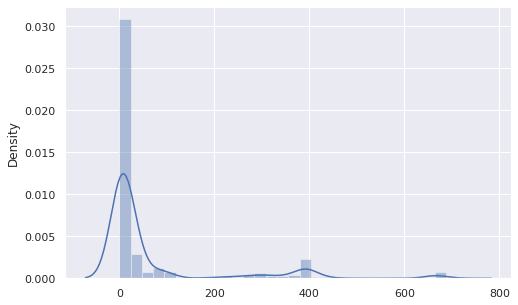

In [ ]:
sns.set(rc={'figure.figsize': (8, 5)})

# TODO 1.4: Plot the target distribution
sns.distplot(boston_df, bins=30)

An important step in almost any model selection process is to know how features are correlated with the target and among themselves. To gain this insight first create a correlation matrix called `boston_corr` by using the `.corr()` method and then plot this matrix as a heat map using seaborn.

Note: 
 - you may want to set a bigger width and high for the figure
 - you can roundup values in a dataframe to a number of decimal places by using `.round(decimal_places)`

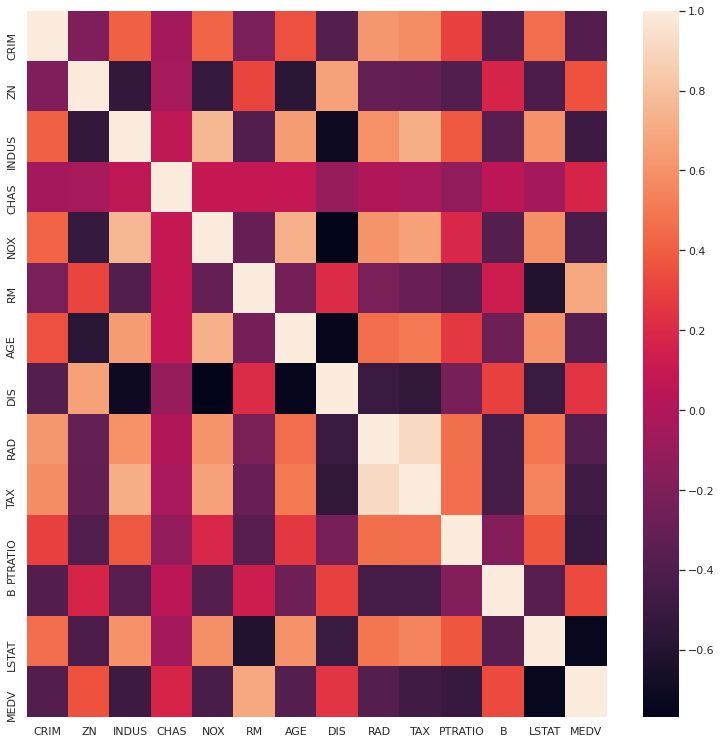

In [ ]:
sns.set(rc={'figure.figsize': (13, 13)})
# TODO 1.5: Create and plot the dataset correlation matrix
# boston_corr = boston_df.corr()
boston_corr = boston_df.round(3).corr()
sns.heatmap(boston_corr)

Ok, now you should be able to glean from the heat map which features are correlated with the target and which features are highly correlated with each other. However, correlation only gives a hint about the linear dependence among features. So, this begs the question:

- Is there no dependence between low correlated features and target?


In order to answer this question we can, for example, generate scatter plots for each feature vs the target MEDV. Complete the TODO bellow by generating a pandas scatter plot where `feature` is the x axis while our Boston dataset target `MEDV` is the y axis.

**Note:** To plot correctly make sure you pass in the axes argument `ax=axes[r,c]` such that plots are organized correctly along the grid, Also, pass the `color='b'` argument to set a color. In this case `'b'` sets the color to blue.

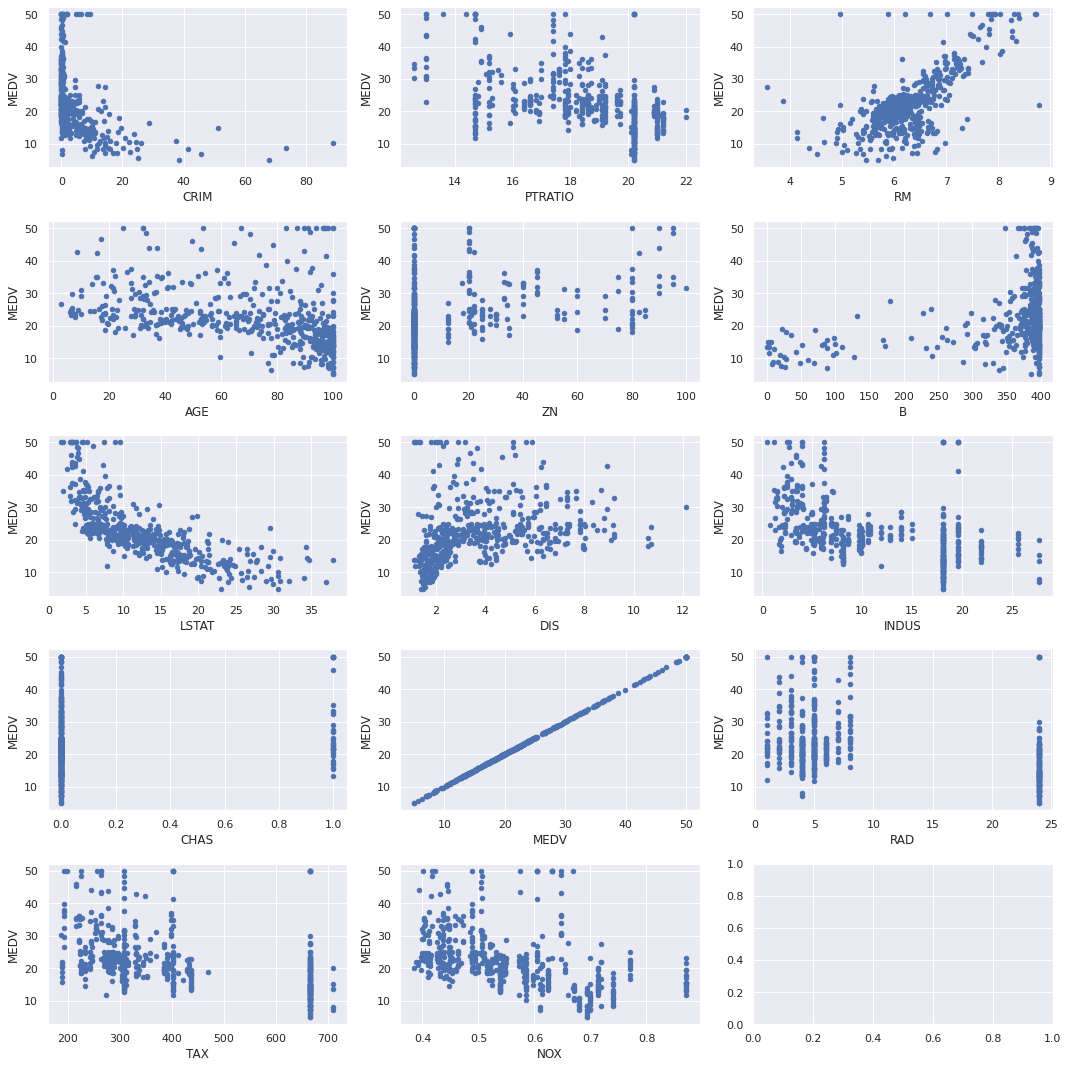

In [ ]:
rows=5
cols=3
fig, axes = plt.subplots(nrows=rows, ncols=cols,figsize=(15,15))
for i, feature in zip(range(len(boston_df.keys())), boston_df.keys()):
    r,c = i%rows, i%cols
    # TODO 1.6: create a pandas scatter plot with aditional parameters: ax=axes[r,c] and color='b'
    boston_df.plot(kind='scatter', x=feature, y='MEDV', c='b', ax=axes[r,c])

    
plt.tight_layout()

While the approximate linear trend of `RM` and `LSTAT` with `MEDV` can distinguished from these graphs, as was first revealed by the correlation matrix, we can also see other highly non-linear dependencies. For example the trend between `CRIM` and `MEDV` might be explained as follows:
 - low priced houses are indicative of higher crime rates. 
 - mid-priced houses are indicative of lower crime rates. 
 - high priced houses show a somewhat increased crime rate, as they may be considered to be high valued targets for burglars.
 
Of course, this is just one possible (weak) explanations since other factors influence both crime-rate and house price that the dataset may not capture (e.g. house area location, how many schools/police departments are in each area, state of each house and so on). Moreover, other features are so non-linearly related that it is hard to know which feature may be more or less relevant to the prediction of house price.

So, this motivates us to both increase the model capacity and the use regularization. In other words, use techniques that allow the model to better generalize the intricacies which we can't easily spot. 

But first we will have to establish a baseline from which we'll try to improve!

## ETL and Model Building
### Task 2 - Establishing a Baseline

In order to establish a baseline the sensible thing we can do here is: use only highly correlated features to estimate the price, namely `RM` and `LSTAT`. Hence, we will deliberately ignore part of the data in the hopes that features which show an approximate linear relationship with the target will gives us a good enough model.

Create X form `RM` and `LSAST` features and y from `MEDV` in the TODO bellow - recall that sklearn models work with numpy arrays, so you will need to use `to_numpy()` method. 

In [ ]:
# TODO 2.1 Generate X and y for the baseline
X = boston_df[['RM', 'LSTAT']]
y = boston_df['MEDV']

X = X.to_numpy()
y = y.to_numpy()

Create a train/test split with 70\% training examples and 30\% test examples using `random_state=21`.

**Note:** Do not forget to import the appropriate module.

In [ ]:
# TODO 2.2 Import & create the train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

Instantiate a linear regression model `linear_reg` with `normalize=True` and `n_jobs=-1`. Train the model and then print it's R^2 score for train and test sets.

**Note:** Do not forget to import the appropriate module.

In [ ]:
# TODO 2.3 a) Import and train the model
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression(normalize=True, n_jobs=-1)
linear_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [ ]:
# TODO 2.3 c) Print the R^2 scores
print("R^2 Train: {}".format(linear_reg.score(X_train, y_train)))
print("R^2 Test: {}".format(linear_reg.score(X_test, y_test)))

R^2 Train: 0.6345062445326455
R^2 Test: 0.64111807337877


Now, lets see if we can do better via cross-validation. For this you need to import from ` sklearn.model_selection` the [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html?highlight=cross_val_score#sklearn.model_selection.cross_val_score). This function, evaluates a given estimator via k-fold cross-validation outputting an array of scores of the for each run of the cross validation. Hence, we will need to average these score. The function main parameters are as follows:
 - `estimator` is the estimator object, e.g. linear_reg
 - `X` is the feature matrix
 - `y` is target 
 - `cv` is the number of folds
 

Complete the TODO's bellow by first importing `cross_val_score` and instantiating a new linear regressor called `cv_linear_reg` with `normalize=True` and `n_jobs=-1`. Then compute the scores using 6-fold cross validation in `cv_scores` and average the scores (hint: `np.mean()`) to print the final result.

**Note:** Here you will use the entire dataset.


In [ ]:
# TODO 2.4 Import cross_val_score and instantiate linear regressor
from sklearn.model_selection import cross_val_score
cv_linear_reg = LinearRegression(normalize=True, n_jobs=-1)

In [ ]:
# TODO 2.5 Compute the 6-fold cross-validation scores
k=6
cv_scores = cross_val_score(estimator=cv_linear_reg, X=X, y=y, cv=k)

In [ ]:
# TODO 2.6 Print average cv_score
np.mean(cv_scores)

0.34956825694062815

It looks like trough cross-validation we obtain a half the prediction accuracy. Let's plot the learning curves of each model to see if we can gain some insight. 

For this, you can use the `plot_learning_curve` already imported for you from `utilities` package. The main parameters for this function are:
 - `estimator` object, e.g. linear_reg or cv_linear_reg
 - `title` string representing the title for the chart
 - `X` is the feature matrix
 - `y` is the target
 - `cv` is the number of folds to use, i.e. this function uses cross-validation under the hood
 - `train_size` represents an array of training sizes to test out, e.g. `np.linspace(0.1, 1.0, 10))` or \[10, 50, 100\]
 
Complete the TODO below.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

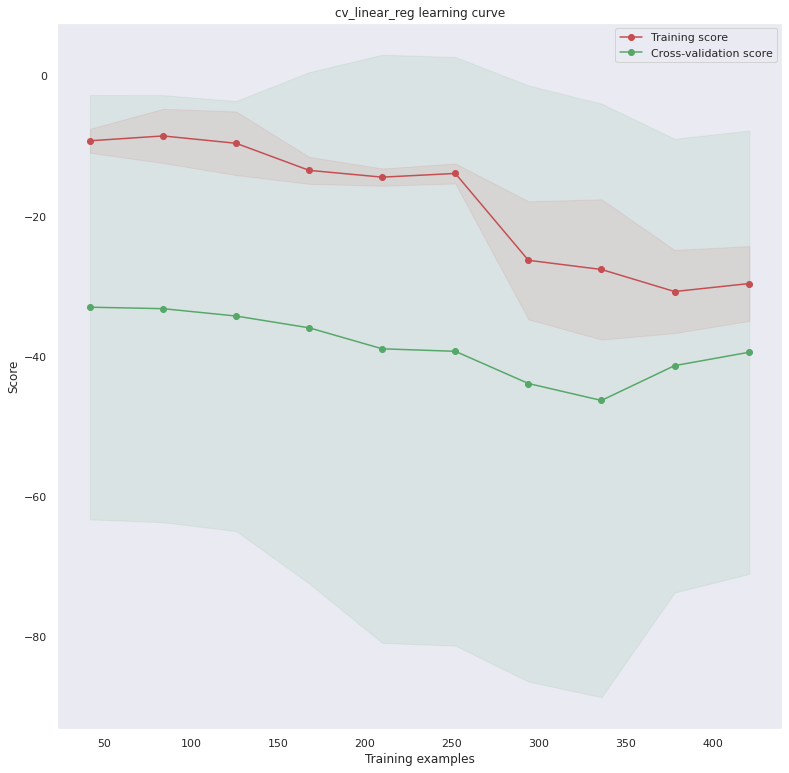

In [ ]:
cv_linear_reg = LinearRegression(normalize=True, n_jobs=-1)
title = r'Learning Curves (Linear Regression)'
# TODO 2.7: plot the learning curve for cv_linear_reg with the same number of folds
plot_learning_curve(cv_linear_reg, title, X, y, cv=k, train_sizes=np.linspace(0.1, 1.0, 10), scoring='neg_mean_squared_error', random_state=21)

Look back at the features vs. target (i.e. `RM` and `LSTAT` vs. `MEDV`). Taking into account the learning curves, what possible reasons are there for the decrease in accuracy for cross-validation?


Anyway, we will take as our baseline our 70/30\% split linear model fitting, since we obtained a much higher score.


### Task 3 - Building a Non-Linear Model 

Now, as explained in the course, we can transform our features through basis functions in order to capture non-linear dependencies. Or in other words, transform our features to a higher dimensional space where they may become linearly separable. 

First, regenerate X and y such that all features are taken into account.

In [ ]:
# TODO 3.1. Generate X and y
X = boston_df.drop('MEDV', 1)
y = boston_df['MEDV']

For this task we're going to use two transformations, namely: a polynomial feature transformation and a *Radial Basis Function*  transform, RBF for short. The `PolynomialFeatures()` and the `RBFSampler()` are found in the `sklearn.preprocessing ` and `sklearn.kernel_approximation`, respectively. Both objects expose the `fit_transform(...)` method which takes as input the original features X and transform them accordingly. 

The [polynomial feature transformation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=polynomialfeatures) main argument is the `degree` of the polynomial, whereas the [RBF](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_approximation.RBFSampler.html?highlight=rbfsampler) main argument is the `gama` parameter which may be thought as the curvature of the decision boundary (a low value means little curvature, while a high value means a high curvature).

Import the two  transformations by completing the TODO below.

In [ ]:
# TODO 3.2. Import the two transformations
from sklearn.preprocessing import PolynomialFeatures
from sklearn.kernel_approximation import RBFSampler

Now, instantiate both polynomial and RBF transformations in `poly_kernel` and `rbf_kernel` respectively. Set the degree of the polynomial to 4, whereas for the RBF set the gama parameter to 0.00008 with `random_state=21`

In [ ]:
# TODO 3.3. Instantiate transformations
poly_kernel = PolynomialFeatures(degree=4)
rbf_kernel = RBFSampler(gamma=0.00008, random_state=21)

OK, now use the `fit_transform()` method to generate new features `X_poly` and `X_rbf`.

In [ ]:
# TODO 3.4. Generate new features
X_poly = poly_kernel.fit_transform(X, y)
X_rbf = rbf_kernel.fit_transform(X, y)

Good, we now have two sets of features for which we can use `LinearRegression()` to try to fit the data. Hence, instantiate two linear regression models: `poly_linear_reg` and `rbf_linear_reg`, respectively. Don't forget to pass the `normalize=True` and `n_jobs=-1` arguments to both models.

In [ ]:
# TODO 3.5. Instantiate the linear models
poly_linear_reg = LinearRegression(normalize=True, n_jobs=-1)
rbf_linear_reg = LinearRegression(normalize=True, n_jobs=-1)

Great, now as before do a 70/30\% split for the new features, fit the two models and then print the R^2 score of each model.

In [ ]:
# TODO 3.6. Split, fit and print the score for X_poly
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.3)
poly_linear_reg.fit(X_train_poly, y_train_poly)

print("Train R^2: {}".format(poly_linear_reg.score(X_train_poly, y_train_poly)))
print("Test R^2: {}".format(poly_linear_reg.score(X_test_poly, y_test_poly)))
print('\n')

# TODO 3.6. Split, fit and print the score for X_rbf
X_train_rbf, X_test_rbf, y_train_rbf, y_test_rbf = train_test_split(X_rbf, y, test_size=0.3)
rbf_linear_reg.fit(X_train_rbf, y_train_rbf)

print("Train R^2: {}".format(rbf_linear_reg.score(X_train_rbf, y_train_rbf)))
print("Test R^2: {}".format(rbf_linear_reg.score(X_test_rbf, y_test_rbf)))
print('\n')

Train R^2: 1.0
Test R^2: -55.105226519450646


Train R^2: 0.8913262768401559
Test R^2: 0.3793610663435658




Great! From the results above what can you tell about the two non-linear models:
- Is any of the two better than our baseline?
- Are the models overfitting or underfitting?
- What model has the largest capacity?

### Task 4 - Model Regularization

Simply increasing the models capacity may or may not yield better results. While from the non-linear transformations perspective it is (usually) very hard to deduce which features contribute toward a better generalization. Thus, a straight forward way to cope with these problems is to use a fairly complex model and avoid overfitting by regularizing it.

So, lets give a try to [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) and Lasso regularizers. First import both `Ridge` and `Lasso` modules located in `sklearn.linear_model`.

In [ ]:
# TODO 4.1. Import Ridge and Lasso regularizers
from sklearn.linear_model import Ridge, Lasso

Now instantiate both Ridge and Lasso in `ridge_reg` and `lasso_reg` by setting `alpha=0.1` and `alpha=0.01`, respectively. 


**Note:** Don't forget to set `normalize=True`.

In [ ]:
# TODO 4.2. Instantiate Ridge and Lasso models
ridge_reg = Ridge(alpha=0.1, normalize=True)
lasso_reg = Lasso(0.001, normalize=True)

We can now use the `fit()` and `.predict()` methods to train and make inferences with the two models. First let's try the models on the the ploynomial features to see if we gain any improvement. 

As before complete the TODO's below by performing the following steps:
- generate polynomial features with a higher degree of 5
- do a 70/30\% split with a `random_state=21`
- fit the two models
- print both train and test scores for each model

In [ ]:
# TODO 4.3. a) Generate X_poly features
poly_kernel = PolynomialFeatures(degree=5)
X_poly = poly_kernel.fit_transform(X, y)

In [ ]:
# TODO 4.3. b) Do a 70/30 split
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.3, random_state=21)

In [ ]:
# TODO 4.3. c) Fit the two models
ridge_reg.fit(X_train_poly, y_train_poly)
lasso_reg.fit(X_train_poly, y_train_poly)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130.41614637476414, tolerance: 2.8181541242937853
  positive)


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
# TODO 4.3. d) Print the scores on train/test for the Ridge model
print("Train R^2: {}".format(ridge_reg.score(X_train_poly, y_train_poly)))
print("Test R^2: {}".format(ridge_reg.score(X_test_poly, y_test_poly)))
print('\n')

Train R^2: 0.9574299435444984
Test R^2: 0.8540808176309963




In [ ]:
# TODO 4.3. e) Print the scores on train/test for the Lasso model
print("Train R^2: {}".format(lasso_reg.score(X_train_poly, y_train_poly)))
print("Test R^2: {}".format(lasso_reg.score(X_test_poly, y_test_poly)))
print('\n')

Train R^2: 0.9480780632486118
Test R^2: 0.8708175016176481




How do the two models fair versus  the previous `poly_linear_reg` model? Do they overfit/underfit.

**Note:** You can play around with both degree of the polynomial and the regularization coefficient `alpha` to gain more insight.

What about RBF features? Complete the TODO's bellow by re-instantiating the two models and completing the same steps, but these time with RBF features and play around with `gama` and `alpha`.

In [ ]:
# TODO 4.4. Use Ridge and Lasso with RBF features
#ridge_reg = Ridge(alpha=0.01, normalize=True)
#ridge_reg = Ridge(alpha=0.001, normalize=True)
#ridge_reg = Ridge(alpha=0.0001, normalize=True)
#ridge_reg = Ridge(alpha=0.5, normalize=True)

ridge_reg = Ridge(alpha=0.1, normalize=True)

#lasso_reg = Lasso(alpha=0.01, normalize=True)
#lasso_reg = Lasso(alpha=0.001, normalize=True)
#lasso_reg = Lasso(alpha=0.0001, normalize=True)
#lasso_reg = Lasso(alpha=0.5, normalize=True)

lasso_reg = Lasso(0.001, normalize=True)

#rbf_kernel = RBFSampler(gamma=0.0008, random_state=21)
#rbf_kernel = RBFSampler(gamma=0.008, random_state=21)
#rbf_kernel = RBFSampler(gamma=0.08, random_state=21)

rbf_kernel = RBFSampler(gamma=0.00008, random_state=21)
X_rbf = rbf_kernel.fit_transform(X, y)

X_train_rbf, X_test_rbf, y_train_rbf, y_test_rbf = train_test_split(X_rbf, y, test_size=0.3)

ridge_reg.fit(X_train_rbf, y_train_rbf)
lasso_reg.fit(X_train_rbf, y_train_rbf)

# Don't forget to print the scores for train/test for the two regularized models

print("Train R^2: {}".format(ridge_reg.score(X_train_rbf, y_train_rbf)))
print("Test R^2: {}".format(ridge_reg.score(X_test_rbf, y_test_rbf)))
print('\n')

print("Train R^2: {}".format(lasso_reg.score(X_train_rbf, y_train_rbf)))
print("Test R^2: {}".format(lasso_reg.score(X_test_rbf, y_test_rbf)))
print('\n')

Train R^2: 0.643018420380909
Test R^2: 0.5654116083605608


Train R^2: 0.8105554637270103
Test R^2: 0.5503405922703799




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781.8064932024345, tolerance: 3.1919767344632772
  positive)


- Where you able to obtain better results with RBF features? 
- If either case (yes or no) why do you think this is so?

### Task 5 - Hyper-parameter search

Up to until now we played with all kinds of model parameters manually. However, it is sometimes very hard to guess a good combination of multiple parameters. This is where the grid search algorithm comes at handy. The algorithm is essentially an optimization algorithm which lets you select the best parameters for your optimization problem from a list of parameter options that you provide, hence automating the 'trial-and-error' method. While there are a couple of algorithm variants out there, in this laboratory we're going to use the [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) from the ` sklearn.model_selection` module, which implements a randomized grid search while applying k-fold cross- validation. The most common used parameters are:
- `estimator` defines the model for which the parameter search is to be performed
- `param_distributions` defines a dictionary like structure of parameter names and array of to be searched values
- `cv` as usual defines the k for k-fold cross-validation
- `n_iter` - number of parameter configurations to be randomly sampled from `param_distributions`

To actually run the optimization and than use the best resulting parameters, we simply call `fit()` and `predict()` as usual. Whereas, to define a parameter search grid we must define a dictionary containing  `name:values` pairs to be searched. For example, we can define a parameter grid containing (only) the `alpha` parameter for Ridge/Lasso in the following way:

```Python
param_grid = {'alpha': np.linspace(0.1, 1.0, 20)}
```  
where `np.linespace(0.1,1.0,20)` was used to generate 20 equally spaced values in the interval $(0.1, 1.0)$. 


In order to demonstrate grid searching, we're going to use it conjunction with the ElasticNet estimator. The estimator is located in `sklearn.linear_model`. Recall from the course that [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) was a combination of Ridge/Lasso regularizers controlled by two coefficients ($\alpha$ and $\lambda$) expressed in the loss function bellow:

$$
J_{\mathtt{enet}}(\hat{\theta}) = \frac{\sum\limits_{i=1}^{n}(y_i - x^{T}\hat{\theta})^2}{2n} + \alpha \left[ \frac{1-\lambda}{2} \sum\limits_{j=1}^{m}\hat{\theta}_{j}^2 + \lambda \sum\limits_{j=1}^{m}|\hat{\theta}_{j}| \right]
$$

In sklearn the $\alpha$ is `aplha` parameter, whereas $\lambda$ is denoted by `l1_ratio` parameter. So, let's first import and instantiate the model in `elastic_net_reg` with `normalize=True` and `max_iter=2000`.

In [ ]:
# TODO 5.1. Import and instantiate ElasticNet
from sklearn.linear_model import ElasticNet
elastic_net_reg = ElasticNet(normalize=True, max_iter=2000)

Now, define a parameter grid in `param_grid`containing the following parameters:
 - `alpha` - 100 values in the interval $(0.001, 1.0)$
 - `l1_ratio`  - 100 values in the interval $(0.001, 1.0)$

In [ ]:
# TODO 5.2. Define the parameter grid
param_grid = {
    'alpha': np.linspace(0.001, 1.0, 100),
    'l1_ratio':np.linspace(0.001, 1.0, 100)
}

Ok, import `RadomizedSearchCV` and instantiate with 5-fold cross-validation and a number of 10 parameter combination samples in `hyper_search`.

**Note:** You may also want to set `random_state` to get reproducible results and `n_jobs=-1` to use all CPU's in order to speed up the process.



In [ ]:
# TODO 5.3. Import and instatiate the RandomizedSearchCV object
# n_iter is set to 10 by default
from sklearn.model_selection import RandomizedSearchCV
hyper_search = RandomizedSearchCV(estimator=elastic_net_reg, param_distributions=param_grid, n_jobs=-1, cv=5, random_state=21)

Use the `fit()` method to initiate the search using the polynomial feature/target pair from the previous task, i.e. `X_train_poly`/`y_train_poly`. Then print the scores for train and test sets.

In [ ]:
# TODO 5.4. Initiate the search and print the train/test scores
hyper_search.fit(X_train_poly, y_train_poly)

print("Train R^2: {}".format(hyper_search.score(X_train_poly, y_train_poly)))
print("Test R^2: {}".format(hyper_search.score(X_test_poly, y_test_poly)))
print('\n')

Train R^2: 0.935990504688821
Test R^2: 0.872393623150974




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 356.36389334299315, tolerance: 2.8181541242937853
  positive)


Finally, to view the best obtained parameters you can access the `.best_params_` attribute of the `hyper_search` object.

In [ ]:
# TODO 5.5 Print the best obtained parameters
hyper_search.best_params_

{'alpha': 0.001, 'l1_ratio': 0.4853636363636364}